<a href="https://colab.research.google.com/github/rumman-adnan/Assignment-Sensors-Data/blob/main/Advance_DL_FCN_FCNplus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# Load the training and test data
train_path = '/content/drive/MyDrive/Python work/sim_data/simu_20000_0.1_90_140_train.npy'
test_path = '/content/drive/MyDrive/Python work/sim_data/simu_10000_0.1_141_178_test.npy'
train_data = np.load(train_path)
test_data = np.load(test_path)

# Extract the sensor data and the target variables (S and D)
X_train = train_data[:, :1000]
y_train = train_data[:, -2:]
X_test = test_data[:, :1000]
y_test = test_data[:, -2:]


In [3]:
X_train_mean = np.mean(X_train, axis = 1)
X_train_mean = np.reshape(X_train_mean, (-1,1))
X_train_std = np.std(X_train, axis = 1)
X_train_std = np.reshape(X_train_std, (-1,1))
X_train = (X_train - X_train_mean)/X_train_std


X_test_mean = np.mean(X_test, axis = 1)
X_test_mean = np.reshape(X_test_mean, (-1,1))
X_test_std = np.std(X_test, axis = 1)
X_test_std = np.reshape(X_test_std, (-1,1))
X_test = (X_test - X_test_mean)/X_test_std

### TCN Algorithm
- Z transform Scaling

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import MeanAbsoluteError

# # Load the complete training and testing data
# train_data = np.load('simu_20000_0.1_90_140_train.npy')
# test_data = np.load('simu_10000_0.1_141_178_test.npy')

# # Separate features and labels
# X_train = train_data[:, :1000]
# y_train = train_data[:, -2:]
# X_test = test_data[:, :1000]
# y_test = test_data[:, -2:]

# # Scale the features
# X_train_mean = np.mean(X_train, axis=1)
# X_train_mean = np.reshape(X_train_mean, (-1, 1))
# X_train_std = np.std(X_train, axis=1)
# X_train_std = np.reshape(X_train_std, (-1, 1))
# X_train = (X_train - X_train_mean) / X_train_std

# X_test_mean = np.mean(X_test, axis=1)
# X_test_mean = np.reshape(X_test_mean, (-1, 1))
# X_test_std = np.std(X_test, axis=1)
# X_test_std = np.reshape(X_test_std, (-1, 1))
# X_test = (X_test - X_test_mean) / X_test_std

# Reshape data for TCN
X_train = X_train[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]

# Build the TCN model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalMaxPooling1D(),
    layers.Dense(50, activation='relu'),
    layers.Dense(2)  # Two output nodes, one for S and one for D
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[MeanAbsoluteError()])

# Train the model for 70 epochs and capture loss after each epoch
for epoch in range(70):
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=1)
    loss = history.history['loss'][0]
    mae = history.history['mean_absolute_error'][0]

    # Evaluate the model on the test set
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Mean Absolute Error for S and D separately
    mae_s = MeanAbsoluteError()
    mae_s.update_state(y_test[:, 0], y_pred[:, 0])
    mae_d = MeanAbsoluteError()
    mae_d.update_state(y_test[:, 1], y_pred[:, 1])

    print(f"Epoch {epoch+1}, Train Loss: {loss}, Train MAE: {mae}, Test Loss: {test_loss}, Test MAE: {test_mae}, MAE for S: {mae_s.result().numpy()}, MAE for D: {mae_d.result().numpy()}")


313/313 [==============================] - 7s 23ms/step
Epoch 1, Train Loss: 900.1751098632812, Train MAE: 20.413358688354492, Test Loss: 3886.7744140625, Test MAE: 54.49633026123047, MAE for S: 81.74302673339844, MAE for D: 27.249624252319336
313/313 [==============================] - 7s 22ms/step
Epoch 2, Train Loss: 212.11024475097656, Train MAE: 12.31992244720459, Test Loss: 2137.442138671875, Test MAE: 38.00725173950195, MAE for S: 62.26210021972656, MAE for D: 13.75239372253418
313/313 [==============================] - 8s 24ms/step
Epoch 3, Train Loss: 172.482177734375, Train MAE: 11.206998825073242, Test Loss: 846.1478271484375, Test MAE: 24.299219131469727, MAE for S: 37.57769775390625, MAE for D: 11.020740509033203
313/313 [==============================] - 8s 24ms/step
Epoch 4, Train Loss: 173.70535278320312, Train MAE: 11.26014232635498, Test Loss: 714.7791137695312, Test MAE: 22.419450759887695, MAE for S: 33.94609451293945, MAE for D: 10.892807960510254
313/313 [=========

KeyboardInterrupt: ignored

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import MeanAbsoluteError
from sklearn.model_selection import train_test_split

# # Load the complete training and testing data
# train_data = np.load('simu_20000_0.1_90_140_train.npy')
# test_data = np.load('simu_10000_0.1_141_178_test.npy')

# Separate features and labels
X_train_full = train_data[:, :1000]
y_train_full = train_data[:, -2:]
X_test = test_data[:, :1000]
y_test = test_data[:, -2:]

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Scale the features
X_train_mean = np.mean(X_train, axis=1)
X_train_mean = np.reshape(X_train_mean, (-1, 1))
X_train_std = np.std(X_train, axis=1)
X_train_std = np.reshape(X_train_std, (-1, 1))
X_train = (X_train - X_train_mean) / X_train_std

X_val_mean = np.mean(X_val, axis=1)
X_val_mean = np.reshape(X_val_mean, (-1, 1))
X_val_std = np.std(X_val, axis=1)
X_val_std = np.reshape(X_val_std, (-1, 1))
X_val = (X_val - X_val_mean) / X_val_std

X_test_mean = np.mean(X_test, axis=1)
X_test_mean = np.reshape(X_test_mean, (-1, 1))
X_test_std = np.std(X_test, axis=1)
X_test_std = np.reshape(X_test_std, (-1, 1))
X_test = (X_test - X_test_mean) / X_test_std

# Reshape data for TCN
X_train = X_train[:, :, np.newaxis]
X_val = X_val[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]

# Build the TCN model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(filters=64, kernel_size=1, activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalMaxPooling1D(),
    layers.Dense(50, activation='relu'),
    layers.Dense(2)  # Two output nodes, one for S and one for D
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[MeanAbsoluteError()])

for epoch in range(70):
    # Train the model
    history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_val, y_val), verbose=1, shuffle=False)
    loss = history.history['loss'][0]
    mae = history.history['mean_absolute_error'][0]

    # Evaluate the model
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Mean Absolute Error for S and D separately
    mae_s = MeanAbsoluteError()
    mae_s.update_state(y_test[:, 0], y_pred[:, 0])
    mae_d = MeanAbsoluteError()
    mae_d.update_state(y_test[:, 1], y_pred[:, 1])


    print(f"Epoch {epoch+1}, Train Loss: {loss}, Train MAE: {mae}, Test Loss: {test_loss}, Test MAE: {test_mae}, MAE for S: {mae_s.result().numpy()}, MAE for D: {mae_d.result().numpy()}")
print(f"Test MAE: {test_mae}, MAE for S: {mae_s.result().numpy()}, MAE for D: {mae_d.result().numpy()}")



Epoch 1/40
500/500 [==============================] - 62s 121ms/step - loss: 649.0414 - mean_absolute_error: 18.3296 - val_loss: 1629.9437 - val_mean_absolute_error: 36.4111
Epoch 2/40
500/500 [==============================] - 60s 120ms/step - loss: 221.9544 - mean_absolute_error: 12.5966 - val_loss: 717.0367 - val_mean_absolute_error: 22.5707
Epoch 3/40
500/500 [==============================] - 60s 121ms/step - loss: 179.1862 - mean_absolute_error: 11.4668 - val_loss: 172.5947 - val_mean_absolute_error: 11.2329
Epoch 4/40
500/500 [==============================] - 61s 121ms/step - loss: 167.6306 - mean_absolute_error: 11.0062 - val_loss: 161.9399 - val_mean_absolute_error: 10.8544
Epoch 5/40
500/500 [==============================] - 60s 120ms/step - loss: 164.4415 - mean_absolute_error: 10.8813 - val_loss: 159.2228 - val_mean_absolute_error: 10.7457
Epoch 6/40
500/500 [==============================] - 61s 121ms/step - loss: 164.0685 - mean_absolute_error: 10.8419 - val_loss: 158.4

KeyboardInterrupt: ignored

- Error is not decreasign in FCN model, i stop epochs with keyboard interrupt

In [7]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error for S and D separately
mae_s = MeanAbsoluteError()
mae_s.update_state(y_test[:, 0], y_pred[:, 0])
mae_d = MeanAbsoluteError()
mae_d.update_state(y_test[:, 1], y_pred[:, 1])


print(f"Epoch {epoch+1}, Train Loss: {loss}, Train MAE: {mae}, Test Loss: {test_loss}, Test MAE: {test_mae}, MAE for S: {mae_s.result().numpy()}, MAE for D: {mae_d.result().numpy()}")


313/313 [==============================] - 8s 24ms/step
Epoch 1, Train Loss: 176.28729248046875, Train MAE: 11.352487564086914, Test Loss: 709.376220703125, Test MAE: 22.24258041381836, MAE for S: 33.9527702331543, MAE for D: 10.532404899597168


### FCN_Plus Model
- For both systolic and diastolic BP

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import MeanAbsoluteError
from sklearn.model_selection import train_test_split

# # Load the complete training and testing data
# train_data = np.load('simu_20000_0.1_90_140_train.npy')
# test_data = np.load('simu_10000_0.1_141_178_test.npy')

# Separate features and labels
X_train_full = train_data[:, :1000]
y_train_full = train_data[:, -2:]
X_test = test_data[:, :1000]
y_test = test_data[:, -2:]

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42, shuffle=True)

# Scale the features
X_train_mean = np.mean(X_train, axis=1)
X_train_mean = np.reshape(X_train_mean, (-1, 1))
X_train_std = np.std(X_train, axis=1)
X_train_std = np.reshape(X_train_std, (-1, 1))
X_train = (X_train - X_train_mean) / X_train_std

X_val_mean = np.mean(X_val, axis=1)
X_val_mean = np.reshape(X_val_mean, (-1, 1))
X_val_std = np.std(X_val, axis=1)
X_val_std = np.reshape(X_val_std, (-1, 1))
X_val = (X_val - X_val_mean) / X_val_std

X_test_mean = np.mean(X_test, axis=1)
X_test_mean = np.reshape(X_test_mean, (-1, 1))
X_test_std = np.std(X_test, axis=1)
X_test_std = np.reshape(X_test_std, (-1, 1))
X_test = (X_test - X_test_mean) / X_test_std

# Reshape data for FCN_PLUS
X_train = X_train[:, :, np.newaxis]
X_val = X_val[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]

# Build the FCN_PLUS model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.Conv1D(filters=128, kernel_size=8, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv1D(filters=256, kernel_size=5, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv1D(filters=128, kernel_size=3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(2)  # Two output nodes for S and D
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[MeanAbsoluteError()])

# Train the model for 70 epochs and capture loss after each epoch
for epoch in range(40):
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_val, y_val), shuffle=True, verbose=1)

    train_loss = history.history['loss'][0]
    train_mae = history.history['mean_absolute_error'][0]

    val_loss = history.history['val_loss'][0]
    val_mae = history.history['val_mean_absolute_error'][0]

    # Evaluate the model on the test set
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate Mean Absolute Error for S and D separately
    mae_s = MeanAbsoluteError()
    mae_s.update_state(y_test[:, 0], y_pred[:, 0])
    mae_d = MeanAbsoluteError()
    mae_d.update_state(y_test[:, 1], y_pred[:, 1])

    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train MAE: {train_mae}, Val Loss: {val_loss}, Val MAE: {val_mae}, Test Loss: {test_loss}, Test MAE: {test_mae}, MAE for S: {mae_s.result().numpy()}, MAE for D: {mae_d.result().numpy()}")


313/313 [==============================] - 3s 8ms/step
Epoch 1, Train Loss: 5982.37548828125, Train MAE: 72.51203918457031, Val Loss: 1938.547119140625, Val MAE: 39.82249450683594, Test Loss: 4860.16845703125, Test MAE: 58.725738525390625, MAE for S: 94.5342025756836, MAE for D: 22.917261123657227
313/313 [==============================] - 3s 9ms/step
Epoch 2, Train Loss: 500.7753601074219, Train MAE: 17.151260375976562, Val Loss: 330.54766845703125, Val MAE: 15.13948917388916, Test Loss: 1236.1234130859375, Test MAE: 28.3886775970459, MAE for S: 47.78641891479492, MAE for D: 8.99095344543457
313/313 [==============================] - 3s 8ms/step
Epoch 3, Train Loss: 104.38391876220703, Train MAE: 8.516800880432129, Val Loss: 183.05227661132812, Val MAE: 11.09272289276123, Test Loss: 609.268310546875, Test MAE: 20.736804962158203, MAE for S: 31.830087661743164, MAE for D: 9.64352035522461
313/313 [==============================] - 3s 8ms/step
Epoch 4, Train Loss: 88.73191833496094, Tra

KeyboardInterrupt: ignored

#### 14 and 15 MAE is acheived after 10 epochs

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import MeanAbsoluteError
from sklearn.model_selection import train_test_split

# # Load the complete training and testing data
# train_data = np.load('simu_20000_0.1_90_140_train.npy')
# test_data = np.load('simu_10000_0.1_141_178_test.npy')

# Separate features and labels
X_train_full = train_data[:, :1000]
y_train_full = train_data[:, -2]  # Only Systolic Blood Pressure
X_test = test_data[:, :1000]
y_test = test_data[:, -2]  # Only Systolic Blood Pressure

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42, shuffle=True)

# Scale the features
X_train_mean = np.mean(X_train, axis=1)
X_train_mean = np.reshape(X_train_mean, (-1, 1))
X_train_std = np.std(X_train, axis=1)
X_train_std = np.reshape(X_train_std, (-1, 1))
X_train = (X_train - X_train_mean) / X_train_std

X_val_mean = np.mean(X_val, axis=1)
X_val_mean = np.reshape(X_val_mean, (-1, 1))
X_val_std = np.std(X_val, axis=1)
X_val_std = np.reshape(X_val_std, (-1, 1))
X_val = (X_val - X_val_mean) / X_val_std

X_test_mean = np.mean(X_test, axis=1)
X_test_mean = np.reshape(X_test_mean, (-1, 1))
X_test_std = np.std(X_test, axis=1)
X_test_std = np.reshape(X_test_std, (-1, 1))
X_test = (X_test - X_test_mean) / X_test_std

# Reshape data for FCN_PLUS
X_train = X_train[:, :, np.newaxis]
X_val = X_val[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]

# Build the FCN_PLUS model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.Conv1D(filters=128, kernel_size=8, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv1D(filters=256, kernel_size=5, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv1D(filters=128, kernel_size=3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1)  # Single output node for Systolic Blood Pressure
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[MeanAbsoluteError()])

# Train the model for 70 epochs and capture loss after each epoch
for epoch in range(50):
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_val, y_val), shuffle=False, verbose=1)

    train_loss = history.history['loss'][0]
    train_mae = history.history['mean_absolute_error'][0]

    val_loss = history.history['val_loss'][0]
    val_mae = history.history['val_mean_absolute_error'][0]

    # Evaluate the model on the test set
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train MAE: {train_mae}, Val Loss: {val_loss}, Val MAE: {val_mae}, Test Loss: {test_loss}, Test MAE: {test_mae}")
    prediction = model.predict(X_test)
    mae_systolic = MeanAbsoluteError()
    mae_systolic.update_state(y_test, prediction)
    print("Mean absolute error for systolic is: ",mae_systolic)
# mae = mean_absolute_error(prediction,y_test)
# mae1 = np.mean(np.abs(y_test - prediction))
# print(f"Mean absolute error for systolic BP is: ", mae1)




438/438 [==============================] - 18s 35ms/step - loss: 9461.7539 - mean_absolute_error: 94.9920 - val_loss: 4303.3408 - val_mean_absolute_error: 64.0743
Epoch 1, Train Loss: 9461.75390625, Train MAE: 94.99202728271484, Val Loss: 4303.3408203125, Val MAE: 64.0743408203125, Test Loss: 11595.1640625, Test MAE: 107.09507751464844
438/438 [==============================] - 16s 37ms/step - loss: 1319.6981 - mean_absolute_error: 30.1590 - val_loss: 623.8156 - val_mean_absolute_error: 21.5216
Epoch 2, Train Loss: 1319.6981201171875, Train MAE: 30.158967971801758, Val Loss: 623.8156127929688, Val MAE: 21.521615982055664, Test Loss: 295.0278015136719, Test MAE: 14.062084197998047
438/438 [==============================] - 16s 37ms/step - loss: 100.1823 - mean_absolute_error: 8.2912 - val_loss: 122.0509 - val_mean_absolute_error: 9.1391
Epoch 3, Train Loss: 100.18232727050781, Train MAE: 8.291244506835938, Val Loss: 122.05088806152344, Val MAE: 9.139059066772461, Test Loss: 895.08209228

KeyboardInterrupt: ignored

313/313 [==============================] - 3s 8ms/step


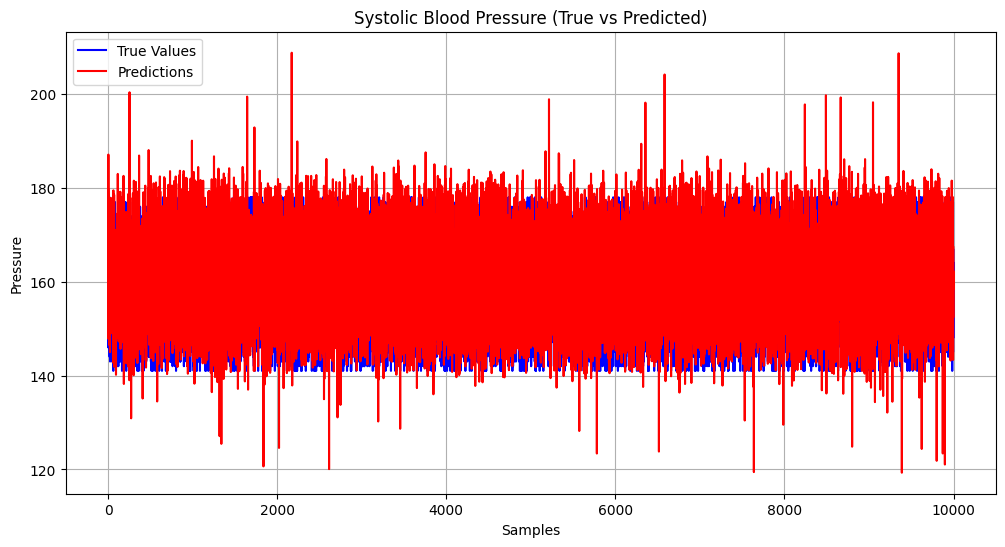

In [5]:
import matplotlib.pyplot as plt

def plot_2vectors(labels, predictions, title, xlabel, ylabel, save_as):
    """
    Plot two vectors (labels vs. predictions).
    """
    plt.figure(figsize=(12, 6))
    plt.plot(labels, 'b-', label='True Values')
    plt.plot(predictions, 'r-', label='Predictions')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.savefig(save_as)
    plt.show()

# Use the LSTM model to predict on the test data
prediction = model.predict(X_test)

# # Extracting the Systolic (S) and Diastolic (D) predictions
# systolic_predictions = predictions[:, 0]
# diastolic_predictions = predictions[:, 1]

# Plotting the results
plot_2vectors(y_test, prediction, "Systolic Blood Pressure (True vs Predicted)", "Samples", "Pressure", "systolic_plot.png")
# plot_2vectors(Y_test_lstm[:, 1], diastolic_predictions, "Diastolic Blood Pressure (True vs Predicted)", "Samples", "Pressure", "diastolic_plot.png")


In [31]:
from tensorflow.keras.metrics import mean_absolute_error
prediction = model.predict(X_test)

# mae = mean_absolute_error(prediction,y_test)
# mae1 = np.mean(np.abs(y_test - prediction))
# print(f"Mean absolute error for systolic BP is: ", mae1)

mae_systolic = MeanAbsoluteError()
mae_systolic.update_state(y_test, prediction)
print("Mean absolute error is: ",mae_systolic)




313/313 [==============================] - 3s 8ms/step
Mean absolute error is:  MeanAbsoluteError(name=mean_absolute_error,dtype=float32)


In [32]:
mae

TypeError: ignored

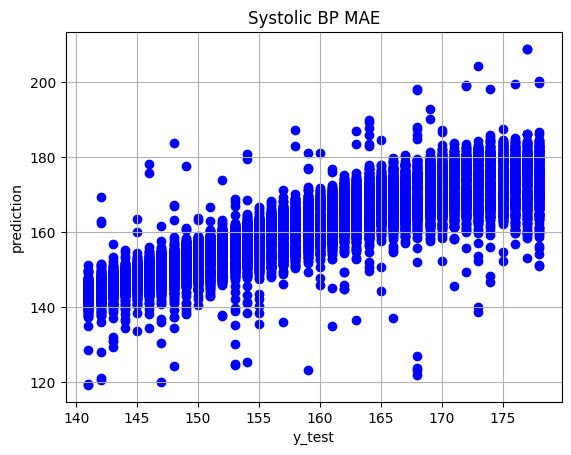

In [28]:
# Create scatter plot
plt.scatter(y_test, prediction, label='Systolic BP', color='blue')
plt.title('Systolic BP MAE')
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.grid(True)

# Add line of best fit
m, b = np.polyfit(y_test, prediction, 1)
plt.plot(y_test, m*y_test + b, color='red', label=f'Best Fit Line\nMAE = {mae:.2f}')

plt.legend()
plt.show()

In [15]:

# Make predictions and mean absolute error
mae_s = MeanAbsoluteError()
mae_s.update_state(y_test, prediction)
print("Mean absolute error is: ",mae_s.result().numpy())

Mean absolute error is:  4.558425


### Good mean absolut error is acheived with FCN algorithm for systolic BP

## FCN_Plus Model
- For Systolic Blood Pressure

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import MeanAbsoluteError
from sklearn.model_selection import train_test_split

# # Load the complete training and testing data
# train_data = np.load('simu_20000_0.1_90_140_train.npy')
# test_data = np.load('simu_10000_0.1_141_178_test.npy')

# Separate features and labels
X_train_full = train_data[:, :1000]
y_train_full = train_data[:, -2]  # Only Systolic Blood Pressure
X_test = test_data[:, :1000]
y_test = test_data[:, -2]  # Only Systolic Blood Pressure

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42, shuffle=True)

# Scale the features
X_train_mean = np.mean(X_train, axis=1)
X_train_mean = np.reshape(X_train_mean, (-1, 1))
X_train_std = np.std(X_train, axis=1)
X_train_std = np.reshape(X_train_std, (-1, 1))
X_train = (X_train - X_train_mean) / X_train_std

X_val_mean = np.mean(X_val, axis=1)
X_val_mean = np.reshape(X_val_mean, (-1, 1))
X_val_std = np.std(X_val, axis=1)
X_val_std = np.reshape(X_val_std, (-1, 1))
X_val = (X_val - X_val_mean) / X_val_std

X_test_mean = np.mean(X_test, axis=1)
X_test_mean = np.reshape(X_test_mean, (-1, 1))
X_test_std = np.std(X_test, axis=1)
X_test_std = np.reshape(X_test_std, (-1, 1))
X_test = (X_test - X_test_mean) / X_test_std

# Reshape data for FCN_PLUS
X_train = X_train[:, :, np.newaxis]
X_val = X_val[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]

# Build the FCN_PLUS model
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.Conv1D(filters=128, kernel_size=8, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv1D(filters=256, kernel_size=5, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv1D(filters=128, kernel_size=3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1)  # Single output node for Systolic Blood Pressure
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=[MeanAbsoluteError()])

# Train the model for 70 epochs and capture loss after each epoch
for epoch in range(50):
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_val, y_val), shuffle=False, verbose=1)

    train_loss = history.history['loss'][0]
    train_mae = history.history['mean_absolute_error'][0]

    val_loss = history.history['val_loss'][0]
    val_mae = history.history['val_mean_absolute_error'][0]

    # Evaluate the model on the test set
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train MAE: {train_mae}, Val Loss: {val_loss}, Val MAE: {val_mae}, Test Loss: {test_loss}, Test MAE: {test_mae}")
    prediction = model.predict(X_test)
    mae_systolic = MeanAbsoluteError()
    mae_systolic.update_state(y_test, prediction)
    print("Mean absolute error for systolic is: ",mae_systolic.result().numpy())
# mae = mean_absolute_error(prediction,y_test)
# mae1 = np.mean(np.abs(y_test - prediction))
# print(f"Mean absolute error for systolic BP is: ", mae1)




438/438 [==============================] - 19s 34ms/step - loss: 8521.0732 - mean_absolute_error: 89.4834 - val_loss: 2967.2517 - val_mean_absolute_error: 52.5870
Epoch 1, Train Loss: 8521.0732421875, Train MAE: 89.48343658447266, Val Loss: 2967.251708984375, Val MAE: 52.58696365356445, Test Loss: 9428.267578125, Test MAE: 96.44403076171875
313/313 [==============================] - 3s 8ms/step
Mean absolute error for systolic is:  MeanAbsoluteError(name=mean_absolute_error,dtype=float32)
438/438 [==============================] - 16s 36ms/step - loss: 901.7488 - mean_absolute_error: 24.2288 - val_loss: 221.2187 - val_mean_absolute_error: 12.2571
Epoch 2, Train Loss: 901.748779296875, Train MAE: 24.22879409790039, Val Loss: 221.2186737060547, Val MAE: 12.257135391235352, Test Loss: 1870.2581787109375, Test MAE: 42.220458984375
313/313 [==============================] - 3s 8ms/step
Mean absolute error for systolic is:  MeanAbsoluteError(name=mean_absolute_error,dtype=float32)
438/438 [=

In [35]:
print("Mean absolute error for systolic is: ",mae_systolic.result().numpy())

Mean absolute error for systolic is:  8.913142


In [36]:
prediction = model.predict(X_test)
mae_systolic = MeanAbsoluteError()
mae_systolic.update_state(y_test, prediction)

mae_s = MeanAbsoluteError()
mae_s.update_state(y_test, prediction)
print("Mean absolute error is: ",mae_s.result().numpy())

313/313 [==============================] - 3s 8ms/step
Mean absolute error is:  8.913142


Mean absolute error is:  8.913142


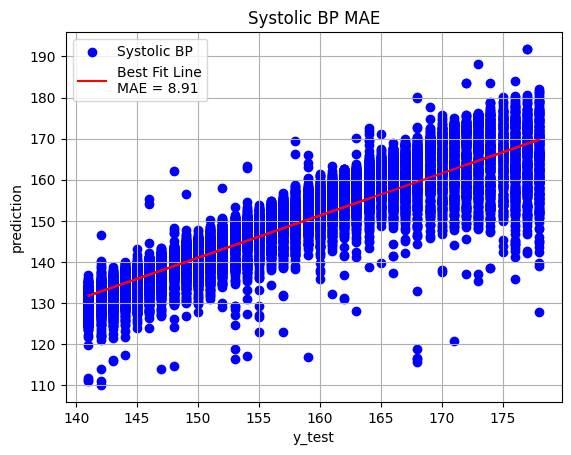

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the mean absolute error
mae_s = MeanAbsoluteError()
mae_s.update_state(y_test, prediction)
mae_value = mae_s.result().numpy()
print("Mean absolute error is: ", mae_value)

# Create scatter plot
plt.scatter(y_test, prediction, label='Systolic BP', color='blue')
plt.title('Systolic BP MAE')
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.grid(True)

# Add line of best fit
m, b = np.polyfit(y_test.flatten(), prediction.flatten(), 1)
plt.plot(y_test, m*y_test + b, color='red', label=f'Best Fit Line\nMAE = {mae_value:.2f}')

plt.legend()
plt.show()


In [37]:

mae_ss = mean_absolute_error(prediction,y_test)
mae_ss = np.mean(np.abs(y_test - prediction))
print(f"Mean absolute error for systolic BP is: ", mae_ss)

Mean absolute error for systolic BP is:  15.288063152787476


### Run for 30 more epochs

In [41]:
# Continue training for 30 more epochs
for epoch in range(30):
    history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_val, y_val), shuffle=False, verbose=1)

    train_loss = history.history['loss'][0]
    train_mae = history.history['mean_absolute_error'][0]

    val_loss = history.history['val_loss'][0]
    val_mae = history.history['val_mean_absolute_error'][0]

    # Evaluate the model on the test set
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

    print(f"Continued Epoch {epoch+1}, Train Loss: {train_loss}, Train MAE: {train_mae}, Val Loss: {val_loss}, Val MAE: {val_mae}, Test Loss: {test_loss}, Test MAE: {test_mae}")

    prediction = model.predict(X_test)
    mae_systolic = MeanAbsoluteError()
    mae_systolic.update_state(y_test, prediction)
    print("Mean absolute error for systolic is: ",mae_systolic.result().numpy())


438/438 [==============================] - 15s 34ms/step - loss: 11.1197 - mean_absolute_error: 2.6048 - val_loss: 22.2861 - val_mean_absolute_error: 3.9442
Continued Epoch 1, Train Loss: 11.11965560913086, Train MAE: 2.604808807373047, Val Loss: 22.286102294921875, Val MAE: 3.9442245960235596, Test Loss: 37.27024841308594, Test MAE: 4.461658000946045
313/313 [==============================] - 3s 9ms/step
Mean absolute error for systolic is:  4.461658
438/438 [==============================] - 16s 37ms/step - loss: 10.8163 - mean_absolute_error: 2.5696 - val_loss: 206.6743 - val_mean_absolute_error: 13.5905
Continued Epoch 2, Train Loss: 10.816266059875488, Train MAE: 2.5695512294769287, Val Loss: 206.6742706298828, Val MAE: 13.590544700622559, Test Loss: 250.49432373046875, Test MAE: 14.626826286315918
313/313 [==============================] - 3s 9ms/step
Mean absolute error for systolic is:  14.626828
438/438 [==============================] - 16s 37ms/step - loss: 10.7873 - mean_ab

KeyboardInterrupt: ignored

In [51]:
tf.saved_model.save(model, '/content/drive/MyDrive/Python work/sim_data')

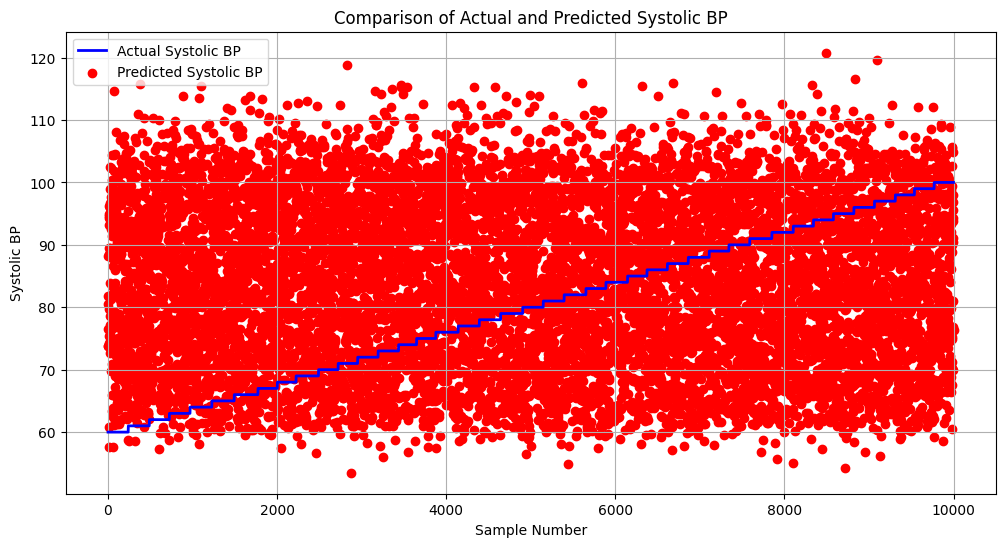

In [68]:
sample_numbers = np.arange(1, len(y_test) + 1)
plt.figure(figsize=(12, 6))


y_test_sorted = np.sort(y_test)
sys_prediction_sorted = np.sort(prediction)
# Plot y_test with a solid line
plt.plot(sample_numbers, y_test_sorted, label='Actual Systolic BP', color='blue', linestyle='-', linewidth=2)

# Plot prediction with scatter points
plt.scatter(sample_numbers, sys_prediction_sorted, label='Predicted Systolic BP', color='red')

# Add title and labels
plt.title('Comparison of Actual and Predicted Systolic BP')
plt.xlabel('Sample Number')
plt.ylabel('Systolic BP')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


Mean absolute error is:  4.3933673


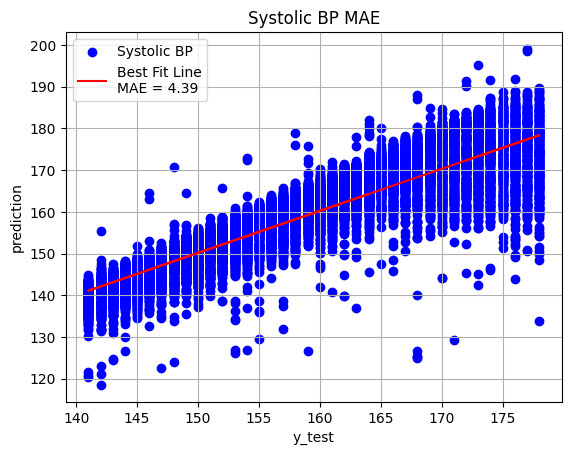

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Compute the mean absolute error
mae_s = MeanAbsoluteError()
mae_s.update_state(y_test, prediction)
mae_value = mae_s.result().numpy()
print("Mean absolute error is: ", mae_value)

# Create scatter plot
plt.scatter(y_test, prediction, label='Systolic BP', color='blue')
plt.title('Systolic BP MAE')
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.grid(True)

# Add line of best fit
m, b = np.polyfit(y_test.flatten(), prediction.flatten(), 1)
plt.plot(y_test, m*y_test + b, color='red', label=f'Best Fit Line\nMAE = {mae_value:.2f}')

plt.legend()
plt.show()


In [43]:
FCN_plus_systolic_model = model


In [45]:
def plot_2vector(x, y, title='', xlabel='', ylabel='', color='blue', line_fit=False, mae=None):
    plt.scatter(x, y, label='Systolic BP', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

    if line_fit:
        m, b = np.polyfit(x.flatten(), y.flatten(), 1)
        plt.plot(x, m*x + b, color='red')

    if mae is not None:
        plt.legend([f'Best Fit Line\nMAE = {mae:.2f}'])
    else:
        plt.legend()

    plt.show()


In [80]:
model

In [85]:
X_test = X_test[:, :, np.newaxis]
y11 = FCN_plus_systolic_model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


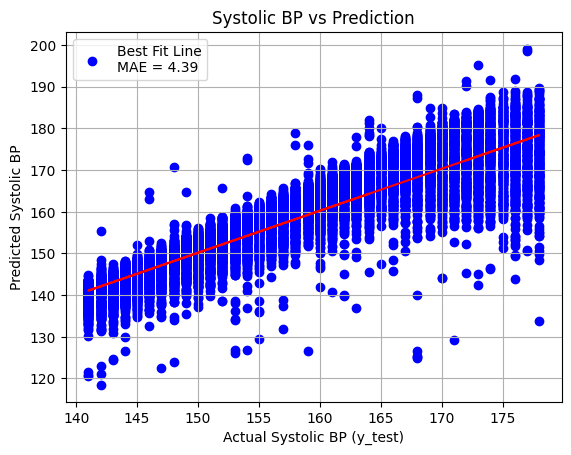

In [46]:
# Compute the mean absolute error
mae_s = MeanAbsoluteError()
mae_s.update_state(y_test, prediction)
mae_value = mae_s.result().numpy()

# Call the function
plot_2vector(y_test, prediction, title='Systolic BP vs Prediction', xlabel='Actual Systolic BP (y_test)', ylabel='Predicted Systolic BP', line_fit=True, mae=mae_value)



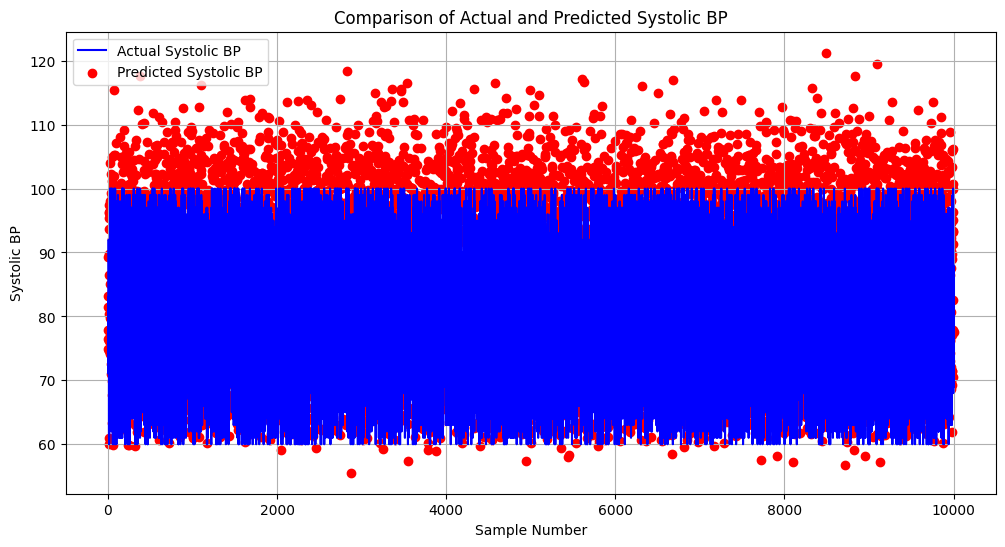

In [49]:
# Function to plot y_test and prediction against sample numbers with specified line styles

def plot_2vectors_with_sample_number_and_style(sample_numbers, y_test, prediction, title='', xlabel='', ylabel=''):
    plt.figure(figsize=(12, 6))

    # Plot y_test with a solid line
    plt.plot(sample_numbers, y_test, label='Actual Systolic BP', color='blue', linestyle='-')

    # Plot prediction with scatter points
    plt.scatter(sample_numbers, prediction, label='Predicted Systolic BP', color='red')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()

    plt.show()
# Generate an array of sample numbers corresponding to the length of y_test or prediction
sample_numbers = np.arange(1, len(y_test) + 1)

# Call the function
plot_2vectors_with_sample_number_and_style(
    sample_numbers,
    y_test,
    prediction,
    title='Comparison of Actual and Predicted Systolic BP',
    xlabel='Sample Number',
    ylabel='Systolic BP'
)


In [88]:
# Separate features and labels
X_train_full = train_data[:, :1000]
y_train_full = train_data[:, -2]  # Only Systolic Blood Pressure
X_test = test_data[:, :1000]
y_test = test_data[:, -2]  # Only Systolic Blood Pressure

In [86]:
sys_prediction = model.predict(X_test)
#FCN_plus_systolic_

313/313 [==============================] - 3s 9ms/step


## FCN_PLUS Algorithm
- For diastolic Blood pressure

In [48]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import MeanAbsoluteError
from sklearn.model_selection import train_test_split



# Separate features and labels
X_train_full = train_data[:, :1000]
y_train_full = train_data[:, -1]  # Only Diastolic Blood Pressure
X_test = test_data[:, :1000]
y_test = test_data[:, -1]  # Only Diastolic Blood Pressure

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42, shuffle=True)

# Scale the features
X_train_mean = np.mean(X_train, axis=1)
X_train_mean = np.reshape(X_train_mean, (-1, 1))
X_train_std = np.std(X_train, axis=1)
X_train_std = np.reshape(X_train_std, (-1, 1))
X_train = (X_train - X_train_mean) / X_train_std

X_val_mean = np.mean(X_val, axis=1)
X_val_mean = np.reshape(X_val_mean, (-1, 1))
X_val_std = np.std(X_val, axis=1)
X_val_std = np.reshape(X_val_std, (-1, 1))
X_val = (X_val - X_val_mean) / X_val_std

X_test_mean = np.mean(X_test, axis=1)
X_test_mean = np.reshape(X_test_mean, (-1, 1))
X_test_std = np.std(X_test, axis=1)
X_test_std = np.reshape(X_test_std, (-1, 1))
X_test = (X_test - X_test_mean) / X_test_std

# Reshape data for FCN_PLUS
X_train = X_train[:, :, np.newaxis]
X_val = X_val[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]

# Build the FCN_PLUS model
diastolic_model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),
    layers.Conv1D(filters=128, kernel_size=8, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv1D(filters=256, kernel_size=5, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv1D(filters=128, kernel_size=3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(1)  # Single output node for Systolic Blood Pressure
])

# Compile the model
diastolic_model.compile(optimizer='adam', loss='mse', metrics=[MeanAbsoluteError()])

# Train the model for 50 epochs and capture loss after each epoch
for epoch in range(50):
    history = diastolic_model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_val, y_val), shuffle=False, verbose=1)

    train_loss = history.history['loss'][0]
    train_mae = history.history['mean_absolute_error'][0]

    val_loss = history.history['val_loss'][0]
    val_mae = history.history['val_mean_absolute_error'][0]

    # Evaluate the model on the test set
    test_loss, test_mae = diastolic_model.evaluate(X_test, y_test, verbose=0)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train MAE: {train_mae}, Val Loss: {val_loss}, Val MAE: {val_mae}, Test Loss: {test_loss}, Test MAE: {test_mae}")
    prediction = diastolic_model.predict(X_test)
    mae_diastolic = MeanAbsoluteError()
    mae_diastolic.update_state(y_test, prediction)
    print("Mean absolute error for diastolic is: ",mae_diastolic.result().numpy())
# mae = mean_absolute_error(prediction,y_test)
# mae1 = np.mean(np.abs(y_test - prediction))
# print(f"Mean absolute error for systolic BP is: ", mae1)




438/438 [==============================] - 18s 35ms/step - loss: 3676.8303 - mean_absolute_error: 57.5325 - val_loss: 1163.8890 - val_mean_absolute_error: 32.1401
Epoch 1, Train Loss: 3676.830322265625, Train MAE: 57.53253173828125, Val Loss: 1163.8890380859375, Val MAE: 32.14011764526367, Test Loss: 1159.1810302734375, Test MAE: 32.061683654785156
313/313 [==============================] - 3s 8ms/step
Mean absolute error for diastolic is:  32.06168
438/438 [==============================] - 15s 34ms/step - loss: 236.2621 - mean_absolute_error: 12.0338 - val_loss: 1124.6627 - val_mean_absolute_error: 32.3397
Epoch 2, Train Loss: 236.26206970214844, Train MAE: 12.033808708190918, Val Loss: 1124.6627197265625, Val MAE: 32.3397102355957, Test Loss: 1017.6702270507812, Test MAE: 30.62932777404785
313/313 [==============================] - 3s 8ms/step
Mean absolute error for diastolic is:  30.629332
438/438 [==============================] - 16s 37ms/step - loss: 44.7271 - mean_absolute_err

In [54]:
FCN_PLUS_diastolic_model = diastolic_model

In [56]:
tf.saved_model.save(model, '/content/drive/MyDrive/Python work/sim_data/FCN_PLUS_diastolic_model')

In [57]:
FCN_PLUS_diastolic_model_50e = diastolic_model

In [58]:
for epoch in range(20):
    history = diastolic_model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_val, y_val), shuffle=False, verbose=1)

    train_loss = history.history['loss'][0]
    train_mae = history.history['mean_absolute_error'][0]

    val_loss = history.history['val_loss'][0]
    val_mae = history.history['val_mean_absolute_error'][0]

    # Evaluate the model on the test set
    test_loss, test_mae = diastolic_model.evaluate(X_test, y_test, verbose=0)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train MAE: {train_mae}, Val Loss: {val_loss}, Val MAE: {val_mae}, Test Loss: {test_loss}, Test MAE: {test_mae}")
    prediction = diastolic_model.predict(X_test)
    mae_diastolic = MeanAbsoluteError()
    mae_diastolic.update_state(y_test, prediction)
    print("Mean absolute error for diastolic is: ",mae_diastolic.result().numpy())

438/438 [==============================] - 17s 38ms/step - loss: 5.8704 - mean_absolute_error: 1.8735 - val_loss: 10.4573 - val_mean_absolute_error: 2.7679
Epoch 1, Train Loss: 5.87044095993042, Train MAE: 1.8734914064407349, Val Loss: 10.457270622253418, Val MAE: 2.7679078578948975, Test Loss: 60.415199279785156, Test MAE: 5.693321228027344
313/313 [==============================] - 3s 9ms/step
Mean absolute error for diastolic is:  5.6933208
438/438 [==============================] - 16s 37ms/step - loss: 5.8177 - mean_absolute_error: 1.8657 - val_loss: 5.0817 - val_mean_absolute_error: 1.7603
Epoch 2, Train Loss: 5.8176984786987305, Train MAE: 1.8656898736953735, Val Loss: 5.081676483154297, Val MAE: 1.760340929031372, Test Loss: 39.853973388671875, Test MAE: 4.22880744934082
313/313 [==============================] - 3s 8ms/step
Mean absolute error for diastolic is:  4.228807
438/438 [==============================] - 15s 35ms/step - loss: 5.7161 - mean_absolute_error: 1.8492 - val

In [60]:
for epoch in range(5):
    history = diastolic_model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_val, y_val), shuffle=False, verbose=1)

    train_loss = history.history['loss'][0]
    train_mae = history.history['mean_absolute_error'][0]

    val_loss = history.history['val_loss'][0]
    val_mae = history.history['val_mean_absolute_error'][0]

    # Evaluate the model on the test set
    test_loss, test_mae = diastolic_model.evaluate(X_test, y_test, verbose=0)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train MAE: {train_mae}, Val Loss: {val_loss}, Val MAE: {val_mae}, Test Loss: {test_loss}, Test MAE: {test_mae}")
    prediction = diastolic_model.predict(X_test)
    mae_diastolic = MeanAbsoluteError()
    mae_diastolic.update_state(y_test, prediction)
    print("Mean absolute error for diastolic is: ",mae_diastolic.result().numpy())

438/438 [==============================] - 16s 36ms/step - loss: 4.8079 - mean_absolute_error: 1.7028 - val_loss: 13.1295 - val_mean_absolute_error: 3.0711
Epoch 1, Train Loss: 4.807898998260498, Train MAE: 1.7027604579925537, Val Loss: 13.129457473754883, Val MAE: 3.0710628032684326, Test Loss: 58.838138580322266, Test MAE: 5.606288909912109
313/313 [==============================] - 3s 9ms/step
Mean absolute error for diastolic is:  5.6062865
438/438 [==============================] - 16s 37ms/step - loss: 4.7687 - mean_absolute_error: 1.6953 - val_loss: 22.0254 - val_mean_absolute_error: 4.2754
Epoch 2, Train Loss: 4.768712043762207, Train MAE: 1.695253610610962, Val Loss: 22.02543830871582, Val MAE: 4.275394439697266, Test Loss: 81.69019317626953, Test MAE: 7.235698223114014
313/313 [==============================] - 3s 8ms/step
Mean absolute error for diastolic is:  7.235697
438/438 [==============================] - 16s 37ms/step - loss: 4.7504 - mean_absolute_error: 1.6916 - val

In [61]:
for epoch in range(20):
    history = diastolic_model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_val, y_val), shuffle=False, verbose=1)

    train_loss = history.history['loss'][0]
    train_mae = history.history['mean_absolute_error'][0]

    val_loss = history.history['val_loss'][0]
    val_mae = history.history['val_mean_absolute_error'][0]

    # Evaluate the model on the test set
    test_loss, test_mae = diastolic_model.evaluate(X_test, y_test, verbose=0)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train MAE: {train_mae}, Val Loss: {val_loss}, Val MAE: {val_mae}, Test Loss: {test_loss}, Test MAE: {test_mae}")
    prediction = diastolic_model.predict(X_test)
    mae_diastolic = MeanAbsoluteError()
    mae_diastolic.update_state(y_test, prediction)
    print("Mean absolute error for diastolic is: ",mae_diastolic.result().numpy())

438/438 [==============================] - 17s 38ms/step - loss: 4.7568 - mean_absolute_error: 1.6928 - val_loss: 26.0947 - val_mean_absolute_error: 4.7858
Epoch 1, Train Loss: 4.756789684295654, Train MAE: 1.6928054094314575, Val Loss: 26.094745635986328, Val MAE: 4.785771369934082, Test Loss: 96.88839721679688, Test MAE: 8.121363639831543
313/313 [==============================] - 3s 9ms/step
Mean absolute error for diastolic is:  8.1213665
438/438 [==============================] - 17s 38ms/step - loss: 4.6637 - mean_absolute_error: 1.6756 - val_loss: 14.7703 - val_mean_absolute_error: 3.4571
Epoch 2, Train Loss: 4.663681983947754, Train MAE: 1.6756004095077515, Val Loss: 14.770330429077148, Val MAE: 3.457101583480835, Test Loss: 75.51539611816406, Test MAE: 6.676780700683594
313/313 [==============================] - 3s 9ms/step
Mean absolute error for diastolic is:  6.676781
438/438 [==============================] - 15s 35ms/step - loss: 4.6336 - mean_absolute_error: 1.6714 - val

KeyboardInterrupt: ignored

In [62]:
print("Mean absolute error for diastolic is: ",mae_diastolic.result().numpy())

Mean absolute error for diastolic is:  4.3867064


### After 75 epochs, this accuracy is acheived for diastolic BP and this is mean absolute error

In [63]:
FCN_PLUS_diastolic_model_60e = diastolic_model

In [64]:
tf.saved_model.save(model, '/content/drive/MyDrive/Python work/sim_data/FCN_PLUS_diastolic_model_60e')

In [65]:
y_test

array([83., 79., 73., ..., 88., 87., 69.])

In [73]:
FCN_PLUS_diastolic_model_60e.predict

313/313 [==============================] - 4s 11ms/step


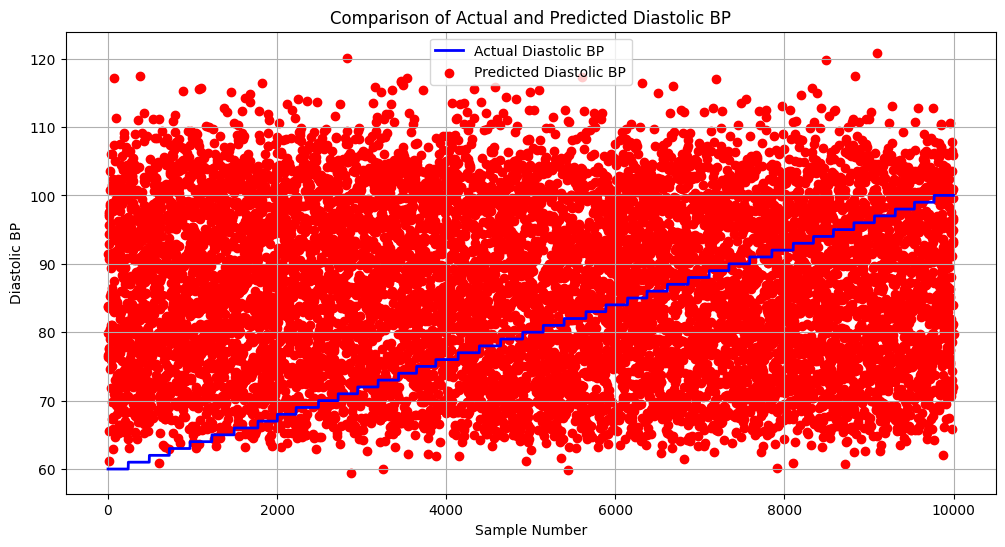

In [74]:
dia_prediction = diastolic_model.predict(X_test)


sample_numbers = np.arange(1, len(y_test) + 1)
plt.figure(figsize=(12, 6))


y_test_sorted = np.sort(y_test)
dias_prediction_sorted = np.sort(dia_prediction)
# Plot y_test with a solid line
plt.plot(sample_numbers, y_test_sorted, label='Actual Diastolic BP', color='blue', linestyle='-', linewidth=2)

# Plot prediction with scatter points
plt.scatter(sample_numbers, dias_prediction_sorted, label='Predicted Diastolic BP', color='red')

# Add title and labels
plt.title('Comparison of Actual and Predicted Diastolic BP')
plt.xlabel('Sample Number')
plt.ylabel('Diastolic BP')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [99]:
mae_diastolic.result().numpy()

4.3867064

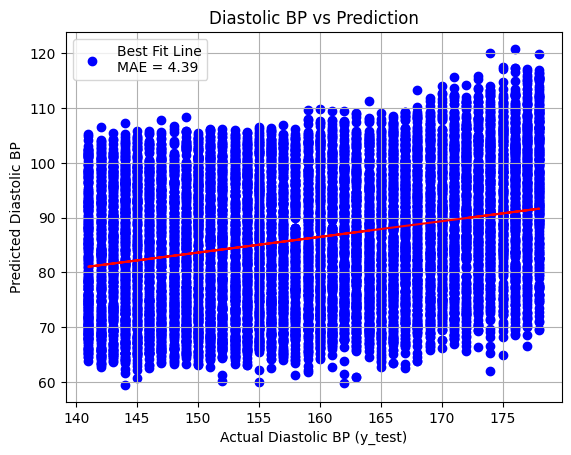

In [100]:

# mae_s = MeanAbsoluteError()
# mae_s.update_state(y_test, prediction)
# mae_value = mae_s.result().numpy()

plot_2vector(y_test, dia_prediction, title='Diastolic BP vs Prediction', xlabel='Actual Diastolic BP (y_test)', ylabel='Predicted Diastolic BP', line_fit=True, mae=mae_diastolic.result().numpy())

